In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import EarlyStopping
import cv2

Total number of images in emotion 0: 3995
Total number of images in emotion 1: 516
Total number of images in emotion 2: 4097
Total number of images in emotion 3: 7215
Total number of images in emotion 4: 4830
Total number of images in emotion 5: 3171
Total number of images in emotion 6: 4965


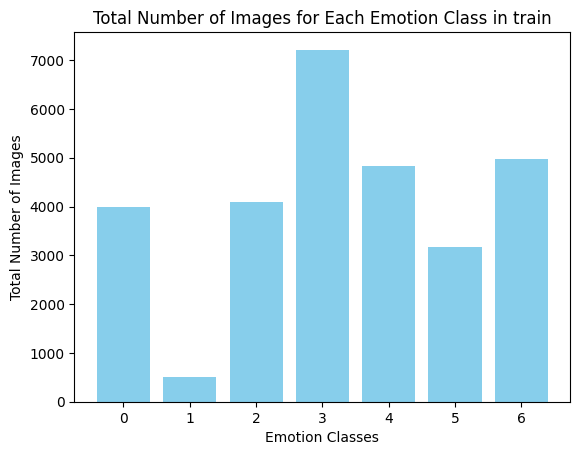

In [13]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return 0

    # Count the number of files with common image extensions
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif']
    image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(tuple(image_extensions)))

    return image_count

# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']
total_images_per_emotion = []

# Iterate through each emotion folder
for emotion_folder in emotion_folders:
    folder_path = f'data/train/{emotion_folder}'  # Adjust the path based on your directory structure
    total_images = count_images_in_folder(folder_path)
    total_images_per_emotion.append(total_images)
    print(f'Total number of images in emotion {emotion_folder}: {total_images}')

# Plotting the bar graph
plt.bar(emotion_folders, total_images_per_emotion, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Total Number of Images')
plt.title('Total Number of Images for Each Emotion Class in train')
plt.show()


['0'Angry=3995, '1'Disgust=436, '2'Fear=4097, '3'Happy=7215, '4'Sad=4830, '5'Surprise=3171, '6'Neutral=4965]

Total number of images in emotion 0: 467
Total number of images in emotion 1: 153
Total number of images in emotion 2: 496
Total number of images in emotion 3: 895
Total number of images in emotion 4: 653
Total number of images in emotion 5: 415
Total number of images in emotion 6: 607


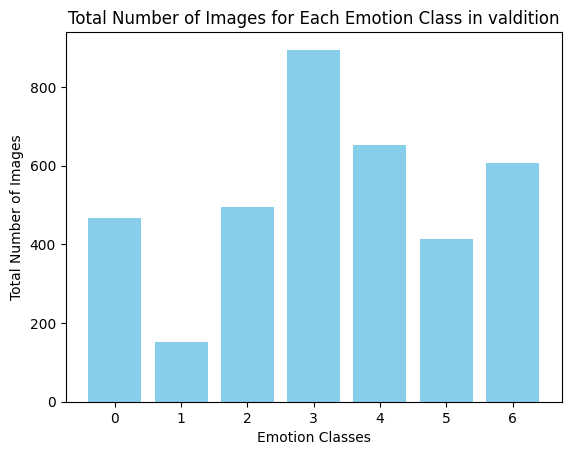

In [14]:
# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']
total_images_per_emotion = []

# Iterate through each emotion folder
for emotion_folder in emotion_folders:
    folder_path = f'data/val/{emotion_folder}'  # Adjust the path based on your directory structure
    total_images = count_images_in_folder(folder_path)
    total_images_per_emotion.append(total_images)
    print(f'Total number of images in emotion {emotion_folder}: {total_images}')

# Plotting the bar graph
plt.bar(emotion_folders, total_images_per_emotion, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Total Number of Images')
plt.title('Total Number of Images for Each Emotion Class in valdition')
plt.show()


['0'Angry=467, '1'Disgust=56, '2'Fear=496, '3'Happy=895, '4'Sad=653, '5'Surprise=415, '6'Neutral=607]

Total number of images in emotion 0: 491
Total number of images in emotion 1: 55
Total number of images in emotion 2: 528
Total number of images in emotion 3: 879
Total number of images in emotion 4: 594
Total number of images in emotion 5: 416
Total number of images in emotion 6: 626


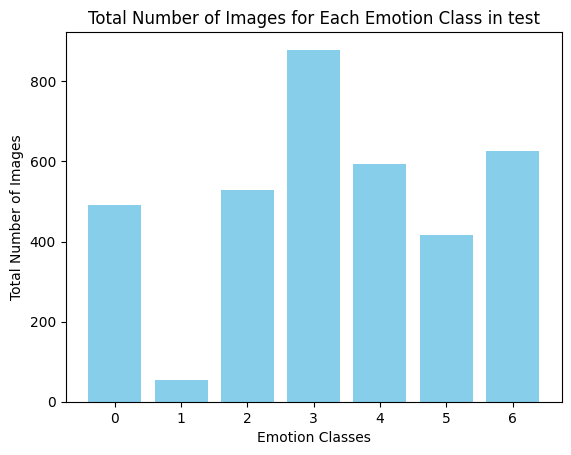

In [15]:
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']
total_images_per_emotion = []

# Iterate through each emotion folder
for emotion_folder in emotion_folders:
    folder_path = f'data/test/{emotion_folder}'  # Adjust the path based on your directory structure
    total_images = count_images_in_folder(folder_path)
    total_images_per_emotion.append(total_images)
    print(f'Total number of images in emotion {emotion_folder}: {total_images}')

# Plotting the bar graph
plt.bar(emotion_folders, total_images_per_emotion, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Total Number of Images')
plt.title('Total Number of Images for Each Emotion Class in test')
plt.show()


In [17]:
print("version: ",tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available())

# Specify the path to your image
image_path = r'data\train\0\355.png'

# Load the image using TensorFlow
img = tf.keras.preprocessing.image.load_img(image_path)

# Get the image size
img_size = img.size

# Print the width and height
width, height = img_size
print(f"Image Width: {width}, Image Height: {height}")


version:  2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
Image Width: 48, Image Height: 48


Data Inspection:

Visually inspect some examples of augmented images to ensure that the augmentation process is not introducing unrealistic distortions or artifacts that could negatively impact training.

In [2]:

seed=tf.random.set_seed(42)
# Define the path to your dataset
data_dir = 'data'

# Define image size and batch size
img_size = (48, 48)
batch_size = 128

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    
)


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing data
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'train'),
    color_mode='grayscale',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6'],
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'val'),
    color_mode='grayscale',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6'],
    shuffle=False  # Set to False for validation
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'test'),
    color_mode='grayscale',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6'],
    shuffle=False  # Set to False for testing
)






Found 28789 images belonging to 7 classes.
Found 3686 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [3]:
# Example: Build and train a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(516, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes for the 7 emotions
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_generator, epochs=200, validation_data=val_generator, callbacks=[early_stopping])


# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}, Test loss: {test_loss}')


Epoch 1/200
225/225 [==============================] - 227s 991ms/step - loss: 1.7919 - accuracy: 0.2740 - val_loss: 1.8780 - val_accuracy: 0.2775
Epoch 2/200
225/225 [==============================] - 15s 68ms/step - loss: 1.6506 - accuracy: 0.3608 - val_loss: 1.7413 - val_accuracy: 0.3877
Epoch 3/200
225/225 [==============================] - 15s 68ms/step - loss: 1.5725 - accuracy: 0.3971 - val_loss: 1.6055 - val_accuracy: 0.3901
Epoch 4/200
225/225 [==============================] - 15s 68ms/step - loss: 1.5214 - accuracy: 0.4141 - val_loss: 1.4669 - val_accuracy: 0.4392
Epoch 5/200
225/225 [==============================] - 15s 68ms/step - loss: 1.4785 - accuracy: 0.4284 - val_loss: 1.4096 - val_accuracy: 0.4688
Epoch 6/200
225/225 [==============================] - 15s 66ms/step - loss: 1.4437 - accuracy: 0.4450 - val_loss: 1.4272 - val_accuracy: 0.4498
Epoch 7/200
225/225 [==============================] - 15s 66ms/step - loss: 1.4159 - accuracy: 0.4573 - val_loss: 1.3538 - val_

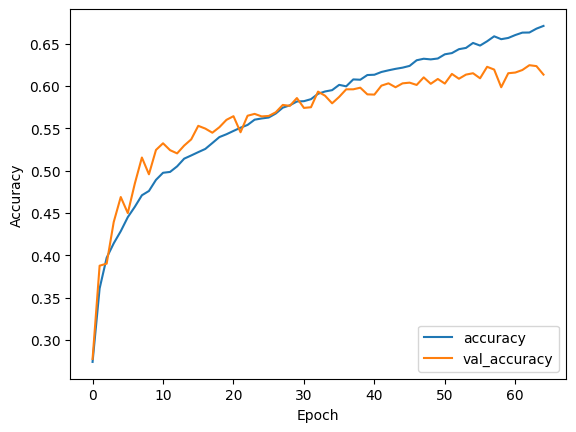

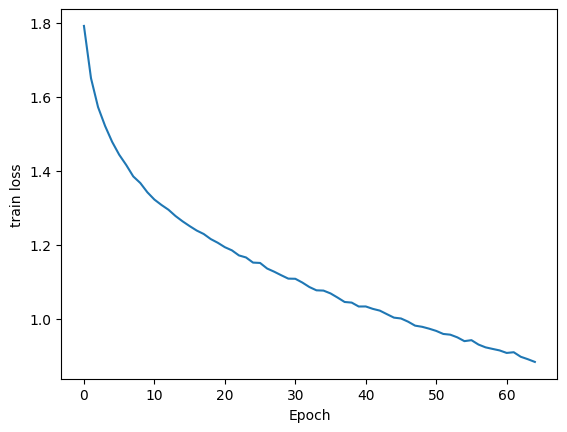

In [4]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'],label='training loss')
plt.xlabel('Epoch')
plt.ylabel('train loss')
plt.show()

Overfitting: If the training accuracy is significantly higher than the validation accuracy, it may indicate overfitting. Overfitting occurs when the model learns the training data too well and fails to generalize to new, unseen data

Underfitting: If both training and validation accuracies are low, the model may be underfitting. Underfitting occurs when the model is too simple to capture the underlying patterns in the data.

In [40]:

from sklearn.metrics import classification_report

# Directory containing the test dataset
test_dir = r'data\test'

# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']

# Load the trained model


# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []



# Iterate through each emotion folder in the test dataset
for emotion_folder in emotion_folders:
    folder_path = os.path.join(test_dir, emotion_folder)

   
    # Make predictions using the model
    predictions = model.predict(test_generator)

    # Get the predicted class index for each image
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Get the true class labels
    true_labels.extend(test_generator.classes)
    predicted_labels.extend(predicted_class_indices)

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=emotion_folders)
print(report)

29/29 [==============================] - 1s 38ms/step
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      3437
           1       0.53      0.29      0.38       385
           2       0.49      0.35      0.41      3696
           3       0.80      0.86      0.83      6153
           4       0.45      0.55      0.50      4158
           5       0.78      0.72      0.75      2912
           6       0.58      0.61      0.60      4382

    accuracy                           0.62     25123
   macro avg       0.60      0.56      0.57     25123
weighted avg       0.62      0.62      0.62     25123



- ['0'Angry=3995, '1'Disgust=436, '2'Fear=4097, '3'Happy=7215, '4'Sad=4830, '5'Surprise=3171, '6'Neutral=4965]
- low recall means that the model failed to correctly identify a large portion of the actual instances of Class
- Data Augmentation: Increase the diversity of instances for Class 1 using data augmentation techniques during training.

In [34]:

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 64)        

In [41]:
# Save the model in the HDF5 format
model.save('model18')

# Load the model later using tf.keras.models.load_model('path/to/save/your/model.h5')


INFO:tensorflow:Assets written to: model18\assets


INFO:tensorflow:Assets written to: model18\assets


1/1 [==============================] - 0s 146ms/step
Angry: 72.71%
Disgust: 1.31%
Fear: 20.77%
Happy: 0.34%
Sad: 1.39%
Surprise: 0.50%
Neutral: 2.99%


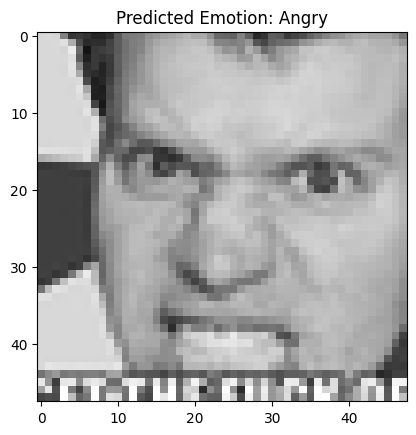

In [36]:


# Assuming you've already loaded the model
# If you haven't loaded it, you can use:
model = tf.keras.models.load_model('model17')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'data\train\0\355.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image
img_array = img_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class_index]
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")
# Visualize the image
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()


fine tune for disgust class


In [52]:
model = tf.keras.models.load_model('model18')

augmented_classes = ['1']
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
augmented_generator = datagen.flow_from_directory(
    directory='data/train/',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    classes=augmented_classes
)
test_disgust=datagen.flow_from_directory(
    directory='data/test/',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    classes=augmented_classes
)
test_datagen=ImageDataGenerator(
    rescale=1./255
)
test=test_datagen.flow_from_directory(
    directory='data/test/',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6']
)

Found 516 images belonging to 1 classes.
Found 55 images belonging to 1 classes.
Found 3589 images belonging to 7 classes.


In [53]:
# Fine-tune the model with augmented data
history=model.fit(augmented_generator, epochs=5)


Epoch 1/5
17/17 [==============================] - 1s 26ms/step - loss: 19.1138 - accuracy: 0.1609
Epoch 2/5
17/17 [==============================] - 0s 26ms/step - loss: 19.4266 - accuracy: 0.0911
Epoch 3/5
17/17 [==============================] - 0s 25ms/step - loss: 27.1829 - accuracy: 0.0620
Epoch 4/5
17/17 [==============================] - 0s 27ms/step - loss: 42.9770 - accuracy: 0.0581
Epoch 5/5
17/17 [==============================] - 0s 26ms/step - loss: 68.0810 - accuracy: 0.0698


In [54]:
model.evaluate(test)

113/113 [==============================] - 1s 11ms/step - loss: 7.3274 - accuracy: 0.1680


[7.327437877655029, 0.16801337897777557]